# Import Dependencies and Data

In [228]:
!pip install tensorflow tensorflow matplotlib tensorflow-datasets ipywidgets

In [284]:
pip list

Package                       Version
----------------------------- ---------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.4.1
astroid                       2.11.7
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         21.4.0
Automat                       20.2.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4

toolz                         0.11.2
tornado                       6.1
tqdm                          4.64.1
traitlets                     5.1.1
Twisted                       22.2.0
typing_extensions             4.6.2
ujson                         5.4.0
Unidecode                     1.3.6
urllib3                       1.26.11
uvicorn                       0.22.0
w3lib                         1.21.0
wcwidth                       0.2.5
webencodings                  0.5.1
websocket-client              0.58.0
websockets                    11.0.3
Werkzeug                      2.0.3
wheel                         0.37.1
widgetsnbextension            3.5.2
wquantiles                    0.6
wrapt                         1.14.1
xarray                        0.20.1
xlrd                          2.0.1
XlsxWriter                    3.0.3
xlwings                       0.27.15
yt-dlp                        2023.3.4
ytmusicapi                    0.24.1
zict                          2.1.0
zipp          

In [281]:
!pip install tensorflow

In [286]:
import tensorflow as tf

print(tf.__version__)


2.15.0


In [287]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [288]:
for gpu in gpus:
    print(gpu)

In [289]:
#for bringing the fashion mnist images
import tensorflow_datasets as tfds
# for vizualization 
from matplotlib import pyplot as plt

In [290]:
import tensorflow_datasets as tfds

ds = tfds.load('fashion_mnist', split='train')


In [291]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [292]:
ds.as_numpy_iterator().next().keys()

2023-11-19 11:39:01.984082: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


dict_keys(['image', 'label'])

In [293]:
ds.as_numpy_iterator().next()['label']
# dataset.take(k).cache().repeat()
# we've built a pipeline , which would iteratively fetch data , instead of loading all of the images in memory
# we're bringing data batch by batch

2023-11-19 11:39:03.742412: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2

# Viz data and build dataset

it's always good practise to visualize data before working with it , otherwise we'd just be working in dark.

In [294]:
#for data transformation
import numpy as np

In [295]:
#setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

2023-11-19 11:39:07.635625: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [298]:
dataiterator.next()
#getting data out of the pipeline

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

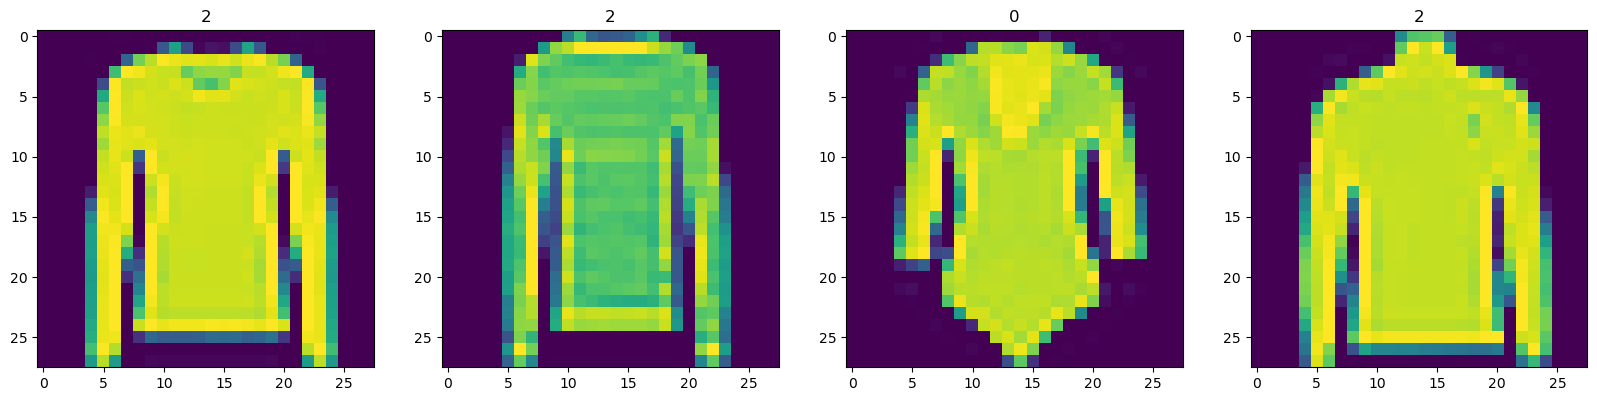

In [299]:
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(sample['label'])

In [300]:
# now since the image values are between 0 to 255, we want to scale them between 0 to 1 for easier computation 
# we'll create scale function
def scale_img(data):
    image = data['image']
    return image/255

## steps for building a data pipeline
1. map
2. cache
3. shuffle
4. batch
5. prefetch

In [301]:
# running the dataset for scale preprocessing

ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_img)

In [302]:
#cache the dataset for that batch
ds = ds.cache()

In [303]:
#shuffling the dataset and not just looking at specific samples
ds = ds.shuffle(60000)

In [304]:
#batching the dataset in batches of 128 images
ds = ds.batch(128)

In [305]:
# reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

now our dataset is prepared

In [306]:
# ds.as_numpy_iterator().next().shape()
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)



# Building the model

## importing modelling components

In [307]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## Generator

In [308]:
def build_generator():
    model = Sequential()
    
    #Block 1: takes in random values and reshapes it in 7x7x128
    # beginning of generated image
    model.add(Dense(7*7*128,input_dim=128))# takes 128 numbers as input
    model.add(LeakyReLU(0.2)) # adds non linearity 0.2 is the -ve value parameter
    model.add(Reshape((7,7,128))) # dense layer output of 6272 and convert it to image of 7x7 of 128 channels
    
    # we want the shape of 28, 28, 1 which is the shape of image in fashion mnist dataset
    # Block 2: doubles the spatial quality
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))# no. of channels = 128, kernal size = 5x5
    model.add(LeakyReLU(0.2))
    
    # Block 3: upsampling to expand the size (doubled) of the image
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # block 4:Conv
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # block 5: Conv 
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    # convolutional layer to get 1 channel output
    model.add(Conv2D(1,4,padding='same',activation = 'sigmoid')) # we are using sigmoid cause we want our final image pixel output between 0 and 1
    
    
    
    
    
    return model

In [309]:
generator = build_generator() # creating instance of generator function

In [310]:
generator.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_74 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_10 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_17 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_71 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_75 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [311]:
# img = generator.predict(np.random.randn(4,128,1))

# here we're generating the image using the generator function we've created
# Here we're generating 4 random images, 
# here we're using numpy(np) to pass 128 random values


###  Using Matplotlib to visualise the images generator as generated

1/1 [==============================] - 0s 341ms/step


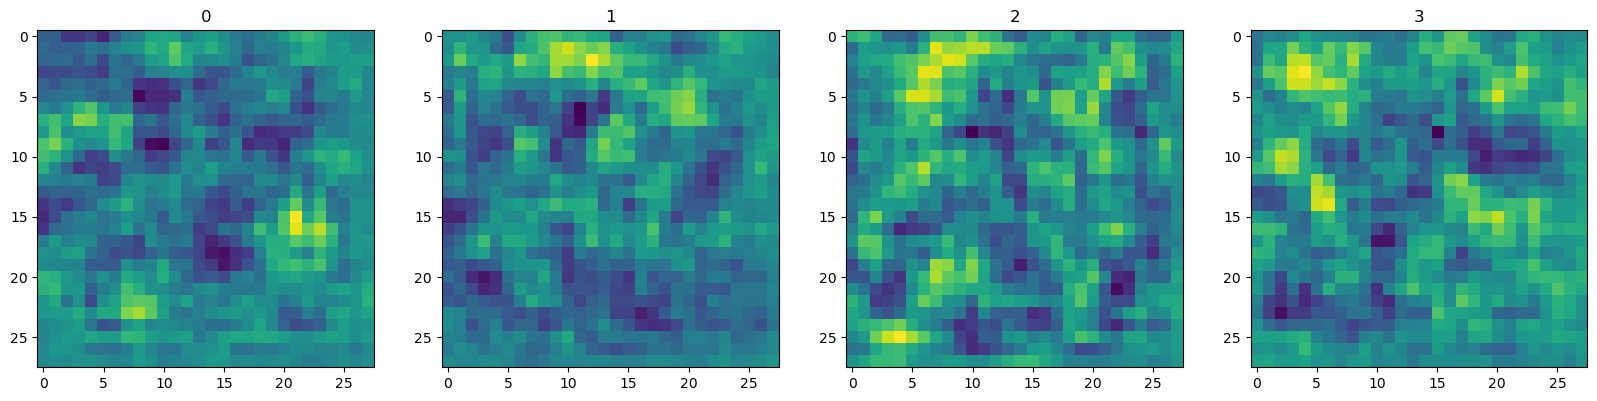

In [312]:
# visualization script copied from above
# Generate new fashion visualization
img = generator.predict(np.random.randn(4,128,1))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

## Discriminator 

Discriminator is just a image classifier: real or fake

In [340]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 
# def build_discriminator():
#      model = Sequential()
     
#      # 1st conv layer
#      model.add(Conv2D(32,5, input_shape = (28,28,1))) # no. of filters = 32 
#                                                       # filter size = 5x5 
#                                                       # here we've used the input image size same as generator output
#      model.add(LeakyReLU(0.2)) # leakyrelu are recommended activation functions when building gans
#      model.add(Dropout(0.4)) # helps the model learn better and does regularization to prevent overfitting
        
#       # 2nd conv layer
#      model.add(Conv2D(64,5))
#      model.add(LeakyReLU(0.2))
#      model.add(Dropout(0.4))
        
#        # 3rd conv layer
#      model.add(Conv2D(128,5))
#      model.add(LeakyReLU(0.2))
#      model.add(Dropout(0.4))
        
#        # 3rd conv layer
#      model.add(Conv2D(256,5))
#      model.add(LeakyReLU(0.2))
#      model.add(Dropout(0.4))
    
#      # Flattening and then pass through dense layer
#      model.add(Flatten())
#      model.add(Dropout(0.4))
#      model.add(Dense(1,activation = 'sigmoid'))
     
     
        
#      return model

In [341]:
discriminator = build_discriminator() # creating instance of discriminator

In [342]:
discriminator.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_83 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_42 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_81 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_84 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_43 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_82 (Conv2D)          (None, 16, 16, 128)     

In [343]:
img.shape


(28, 28, 1)

In [344]:
# discriminator.predict(img)
 # testing the discriminator with image output of generator


# Construct a custom training loop

Building a training loop for GANs can get complicated as , we've to manage learning speed of both generator and discriminator, and both should learn insync

## Setup losses and optimizers 

In [345]:
# Adam is optimizer for both generator and discriminator
from tensorflow.keras.optimizers import Adam
# BinaryCrossentropy is going to loss function 
from tensorflow.keras.losses import BinaryCrossentropy

In [346]:
#instantiation 
g_opt = Adam(learning_rate = 0.001)
d_opt = Adam(learning_rate = 0.0001)
g_loss= BinaryCrossentropy()
d_loss= BinaryCrossentropy()

## Build subclass model

In [347]:
# importing the base class model class to subclass our training step
from tensorflow.keras.models import Model

In [361]:
# tf.random.normal((6,128,1))

In [362]:
# we created a subclass here, and then methods inside it 
# we can also write those functions seperately but inside a class it is 
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 
        
    def train_step(self,batch):
         #batch = 128 image of 28x28x1 
        #get the data
        real_images = batch

        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=True)
        
        
        #Steps for training the discriminator
        
        with tf.GradientTape() as d_tape: # for calculating gradient
            
            
            #pass the real and fake images
            yhat_real = self.discriminator(real_images, training = True) # storing real images in yhat_real variable
            yhat_fake = self.discriminator(fake_images, training = True) # storing fake images in yhat_fake variable
            yhat_realfake = tf.concat([yhat_real,yhat_fake],axis= 0) # combining those images 

            
            
            #create labels for real and fake images
                #since it's discriminator is supervised model we need labels
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis = 0)
                # real image = 0 and fake image = 1

            #Add noise to outputs to TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            #calculate loss function - BINARY CROSS ENTROPY
            total_d_loss = self.d_loss(y_realfake,yhat_realfake)
            
        #backpropogation - by calculating gradient
        d_grad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables) # we're calculating loss for each of trainable variables and reducing loss value
        self.d_opt.apply_gradients(zip(d_grad,self.discriminator.trainable_variables)) # using ADAM optimizer on all those calculated gradients, it'll look gradients for each of those variables and apply backpro 
        
        #training the generator
        with tf.GradientTape() as g_tape:
            
            #Generating new images
            # gen_images = self.generator(tf.random.normal(128,128,1),training = True)
            gen_images = self.generator(tf.random.normal([128, 128, 1]), training=True)

#             gen_images = self.generator(tf.random.normal((128, 128, 128, 1)), training=True)

            
            #Create predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
            
            #Calculate loss
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
         # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}
        

In [363]:
fashgan  = FashionGAN(generator,discriminator) # instance of fashiongan class

In [364]:
# compiling the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

## Build Callback

In [365]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [366]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy() #converting to numpy array
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

## train

In [ ]:
# should ideally be trained on 2000 epochs but can't get that many computing resources on local machine
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
237/469 [==============>...............] - ETA: 1:17:13 - d_loss: 0.3302 - g_loss: 5.2134

#  Test Out the Generator

In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])